In [1]:
import pandas as pd
import seaborn as sns
import os


In [2]:
B = 'Bridges.xlsx'
Bridge = pd.read_excel(B) 
Bridge.head()

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationLRPOffset,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore
0,1.0,Kanch pur Bridge.,PC Girder Bridge,A,14.55,394.23,1986.0,8.0,Dhaka,Dhaka,...,3976.0,8.976,23.0,42.0,7.5,90.0,30.0,57.3,NaN,0.0
1,2.0,Madanpur Bridge.(L),PC Girder Bridge,A,9.20,27.50,2003.0,1.0,Dhaka,Dhaka,...,305.0,12.660,23.0,41.0,28.4,90.0,32.0,41.6,NaN,0.0
2,3.0,Madanpur Bridge(R),PC Girder Bridge,A,9.12,27.50,2007.0,1.0,Dhaka,Dhaka,...,333.0,12.688,23.0,41.0,28.0,90.0,32.0,41.6,NaN,0.0
3,4.0,Langalbandh Bridge.,RCC Girder Bridge,B,17.80,159.52,1998.0,5.0,Dhaka,Dhaka,...,1672.0,17.134,23.0,39.0,33.9,90.0,34.0,10.9,NaN,31.0
4,5.0,Darikandi Bridge (L),PC Girder Bridge,A,9.15,20.50,2002.0,1.0,Dhaka,Dhaka,...,2260.0,17.222,23.0,39.0,21.8,90.0,34.0,27.7,NaN,0.0


In [3]:
#add a column that converts the latitude degree/minutes/seconds to decimals
Bridge['LatitudeDecimal'] = Bridge['LatitudeDegree'] + (Bridge['LatitudeMinute']/60) + (Bridge['LatitudeSecond']/3600)

In [4]:
#add a column that converts the longitude degree/minutes/seconds to decimals
Bridge['LongitudeDecimal'] = Bridge['LongitudeDegree'] + (Bridge['LongitudeMinute']/60) + (Bridge['LongitudeSecond']/3600)
Bridge.head()


,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,Unnamed: 24,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
0,1.0,Kanch pur Bridge.,PC Girder Bridge,A,14.55,394.23,1986.0,8.0,Dhaka,Dhaka,...,23.0,42.0,7.5,90.0,30.0,57.3,NaN,0.0,23.702083,90.515917
1,2.0,Madanpur Bridge.(L),PC Girder Bridge,A,9.20,27.50,2003.0,1.0,Dhaka,Dhaka,...,23.0,41.0,28.4,90.0,32.0,41.6,NaN,0.0,23.691222,90.544889
2,3.0,Madanpur Bridge(R),PC Girder Bridge,A,9.12,27.50,2007.0,1.0,Dhaka,Dhaka,...,23.0,41.0,28.0,90.0,32.0,41.6,NaN,0.0,23.691111,90.544889
3,4.0,Langalbandh Bridge.,RCC Girder Bridge,B,17.80,159.52,1998.0,5.0,Dhaka,Dhaka,...,23.0,39.0,33.9,90.0,34.0,10.9,NaN,31.0,23.659417,90.569694
4,5.0,Darikandi Bridge (L),PC Girder Bridge,A,9.15,20.50,2002.0,1.0,Dhaka,Dhaka,...,23.0,39.0,21.8,90.0,34.0,27.7,NaN,0.0,23.656056,90.574361


In [5]:
# Delete the Unnamed:24 column

Bridge.drop('Unnamed: 24', inplace=True, axis=1, )


In [6]:
# Delete the Unnamed:13 column
Bridge.drop('Unnamed: 13', inplace=True, axis=1, )

In [7]:
# Check if there are any NAN values

print(Bridge.columns)


Index(['Number', 'StructureName', 'StructureType', 'Condition of Bridge',
       'TotalWidth', 'TotalLength', 'ConstructionYear', 'NumberOfSpan', 'Zone',
       'Circle', 'Division', 'Sub-Division', 'RoadNo', 'StructureLRPName',
       'ReferenceLRPNo', 'LocationLRPOffset', 'LocationChainage',
       'LatitudeDegree', 'LatitudeMinute', 'LatitudeSecond', 'LongitudeDegree',
       'LongitudeMinute', 'LongitudeSecond', 'BCS1TotalScore',
       'LatitudeDecimal', 'LongitudeDecimal'],
      dtype='object')


In [8]:
# Drop all rows where there is a value missing
Bridge = Bridge.dropna()

<AxesSubplot:xlabel='TotalWidth', ylabel='Count'>

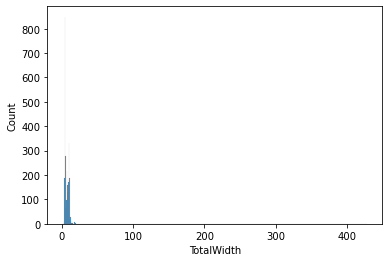

In [9]:
# plot a histogram of the total widths of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x= "TotalWidth")

In [10]:
# check which bridges are wider than 30 meter
Bridge_width = Bridge.loc[Bridge["TotalWidth"]>30]
Bridge_width

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
56,57.0,Shikalbaha Bridge,PC Girder Bridge,A,31.2,17.30,2010.0,1.0,Chittagong,Chittagong,...,247.637,22.0,18.0,55.2,91.0,51.0,19.1,0.0,22.315333,91.855306
1309,1310.0,Bolloppur Bridge,RCC Girder Bridge,C,428.0,10.25,1997.0,1.0,Comilla,Comilla,...,9.950,23.0,34.0,17.2,90.0,56.0,56.3,31.0,23.571444,90.948972


After checking on google these bridges, only Shikalbaha Bridge is correct, the other one are too large namely, 428 and 519 meters


<AxesSubplot:xlabel='TotalLength', ylabel='Count'>

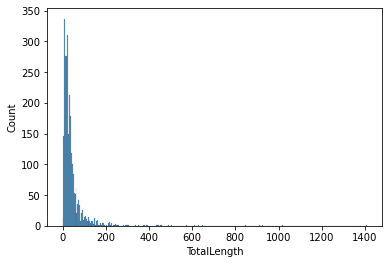

In [11]:
# plot a histogram of the total length of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x= "TotalLength")

In [12]:
Bridge_lenth = Bridge.loc[Bridge["TotalLength"]>500]
Bridge_lenth.head()

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
16,17.0,Meghna Bridge,PC Girder Bridge,A,9.14,924.85,1989.0,13.0,Dhaka,Dhaka,...,24.393,23.0,36.0,34.30,90.0,36.0,43.80,0.0,23.609528,90.612167
31,32.0,Daudkandi Bridge.,PC Box,A,9.13,1408.80,1995.0,17.0,Dhaka,Dhaka,...,37.010,23.0,31.0,47.50,90.0,41.0,42.50,0.0,23.529861,90.695139
55,56.0,Sha Amanot Bridge,PC Box,A,24.28,954.50,2009.0,11.0,Chittagong,Chittagong,...,246.020,22.0,19.0,44.90,91.0,51.0,6.00,0.0,22.329139,91.851667
227,228.0,Bhairab Bridge,PC Box,A,19.75,924.00,2002.0,9.0,Mymensingh,Mymensingh,...,71.834,24.0,2.0,55.84,90.0,59.0,30.15,0.0,24.048844,90.991708
439,440.0,Dhaleshwari Bridge,RCC Girder Bridge,A,7.90,506.59,1964.0,11.0,Dhaka,Dhaka,...,48.000,23.0,52.0,51.60,90.0,1.0,42.90,0.0,23.881000,90.028583


There is no strange outliers identiefied for the length of the bridges.

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
942,943.0,Saforpur Bridge,RCC Girder Bridge,B,4.0,24.3,2080.0,3.0,Sylhet,Moulavi Bazar,...,37.554,24.0,37.0,31.0,92.0,8.0,59.0,30.0,24.625278,92.149722


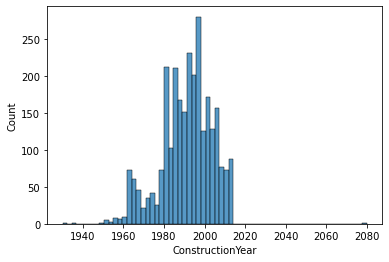

In [13]:
# plot a histogram of the construction year of the bridges in order to identify any strange outliers
sns.histplot(data = Bridge, x = 'ConstructionYear')
ConstructionYear = Bridge.loc[Bridge["ConstructionYear"]>2021]
ConstructionYear

This bridge is from 2080, need to be recoded to 1980 or deleted. 

,Number,StructureName,StructureType,Condition of Bridge,TotalWidth,TotalLength,ConstructionYear,NumberOfSpan,Zone,Circle,...,LocationChainage,LatitudeDegree,LatitudeMinute,LatitudeSecond,LongitudeDegree,LongitudeMinute,LongitudeSecond,BCS1TotalScore,LatitudeDecimal,LongitudeDecimal
346,347.0,Keen Bridge,Steel Beam & RCC Slab,C,5.80,358.00,1936.0,22.0,Sylhet,Sylhet,...,58.496,24.0,53.0,10.3,91.0,52.0,5.2,560.0,24.886194,91.868111
609,610.0,Postagola Bridge,PC Girder Bridge,A,17.60,847.90,1989.0,21.0,Dhaka,Dhaka,...,2.587,23.0,41.0,21.7,90.0,25.0,45.9,0.0,23.689361,90.429417
1188,1189.0,Babu Bazar Bridge,PC Girder Bridge,A,17.60,1018.00,2000.0,31.0,Dhaka,Dhaka,...,1.015,23.0,42.0,17.6,90.0,23.0,56.7,0.0,23.704889,90.399083
1242,1243.0,Gabkhan Bridge,PC Girder Bridge,B,9.75,910.60,2001.0,25.0,Barisal,Barisal,...,19.917,22.0,38.0,34.0,90.0,10.0,58.0,1.0,22.642778,90.182778
2208,2209.0,Atrai Bridge.,RCC Girder Bridge,A,7.87,492.58,2006.0,24.0,Rangpur,Dinajpur,...,10.730,25.0,55.0,50.4,88.0,43.0,14.7,0.0,25.930667,88.720750


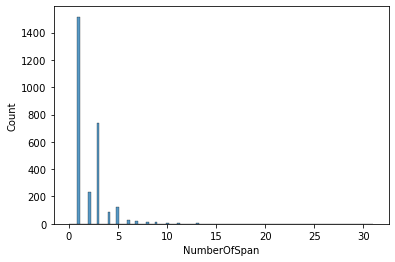

In [14]:
sns.histplot(data = Bridge, x = 'NumberOfSpan')
NumberOfSpan = Bridge.loc[Bridge["NumberOfSpan"]>20]
NumberOfSpan

All these bridges were checked with google and are correct. 

All bridges with a length superior to 500m are actualy existing and that large. 

In [15]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
land = gpd.read_file("EPA1352-G06-A1/data/raw/BGD_adm0.shp")
land["geometry"] = land.buffer(500)
land.plot()

In [ ]:
bridge_geo = gpd.GeoDataFrame(Bridge, geometry=gpd.points_from_xy(Bridge["LongitudeDecimal"], Bridge["LatitudeDecimal"]))
bridge_geo.plot()

In [ ]:
sea_bridge = Bridge.loc[Bridge["LatitudeDecimal"] < 21.834]
sea_bridge1 = sea_bridge.loc[sea_bridge["LongitudeDecimal"] > 90.121]
sea_bridge2 = sea_bridge1.loc[sea_bridge1["LongitudeDecimal"] < 91.85]
sea_bridge2.head()

In [ ]:
sea_bridge3 = Bridge.loc[Bridge["LatitudeDegree"] < 20.794]
sea_bridge3.head()

In [ ]:
sea_bridge4 = Bridge.loc[Bridge["LatitudeDegree"] < 21.45]
sea_bridge5 = sea_bridge4.loc[sea_bridge4["LongitudeDegree"] < 91.89]
sea_bridge5.head()

In [ ]:
sea_bridge6 = Bridge.loc[Bridge["LatitudeDegree"] < 22.05]
sea_bridge7 = sea_bridge6.loc[sea_bridge6["LongitudeDegree"] > 90]
sea_bridge8 = sea_bridge7.loc[sea_bridge7["LongitudeDegree"] < 91.64]
sea_bridge8.head()

In [ ]:
sea_bridges_final = Bridge.subtract(sea_bridge2, axis= 0)
sea_bridges_final

In [ ]:
new = df1.merge(df2,on=['Team','Year'],how='left')
sea_bridge5.rows - sea_bridge3.rows - sea_bridge2.rows
